# Group 2 Project 1 Sector TOP DOGS

In [1]:
import pandas as pd
import numpy as np
import datetime
import os.path
import csv
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

## Function: Get tickers for years

In [2]:
def get_tickers_for_years(years,sector):
    """pass me a list of years [2013,2015,...], and right, ZERO parameter or error checking"""
    tech_csv = Path(f"./{sector}SectorTickers-between-2015-2018.csv")
    #print(type(years))
    tech_tickers_df = pd.read_csv(tech_csv)
    #print(tech_tickers_df.head())
    all_tickers = []
    
    for year in years:
        #print(type(year))
        ticker_list = tech_tickers_df[year].tolist()
        ticker_list = [x for x in ticker_list if str(x) != "nan"]
        all_tickers.extend(ticker_list)
    
    return np.array(all_tickers)

## Function: Calculate the top performing tickers in range

In [3]:
def combined_df_for_timeframe(all_prices_df,ticker_list,day_start,day_end,sector):
    """Explain what I do here ;) """
    top_dogs = None
    
    print(f"\n\nRunning combined_df_for_timeframe wtih start: {day_start} and end: {day_end}\n\n")
    
    range_df = all_prices_df[(all_prices_df['Date'] >= day_start) & (all_prices_df['Date'] <= day_end)]

    # Create empty dataframe with dates
    prices_df = range_df[range_df['Ticker']=='A']
    prices_df = prices_df[['Date','Adj Close']].copy()
    prices_df = prices_df.drop(columns=["Adj Close"])
    prices_df = prices_df.set_index('Date')
    
    for ticker in ticker_list:
        if ticker in ticker_list:
            # I can't say I understand this bit... [Will]
            ticker_df = range_df[range_df['Ticker']==ticker]
            ticker_df = ticker_df[['Date', 'Adj Close']].copy()
            ticker_df = ticker_df.rename(columns={'Adj Close':ticker})
            ticker_df = ticker_df.set_index('Date')
            prices_df = pd.concat([prices_df, ticker_df], axis="columns", sort=True)
            
    return prices_df

## Function: Calc percentage Change, and return TOP 10 best performing TICKERS as DataFrame

In [4]:
def top_10_df(df):
    pct_change = df.pct_change()
    cumulative_returns = (1+pct_change).cumprod() -1
    cum_returns = cumulative_returns.tail(1).T
    column = cum_returns.columns[-1]
    top = cum_returns.sort_values(by=column,ascending=False)
    top = top.drop_duplicates()
    top = top.head(10)
    top = top.reset_index()
    return top

## Function: Return the returns of the TOP DOG Portfolio as DataFrame

In [5]:
def top_10_returns(df,sector,year):
    weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
    portfolio_monthly = df.dot(weights)
    my_portfolio_one = (1+ portfolio_monthly).cumprod() -1
    plt.plot(my_portfolio_one)
    plt.xlabel('Time')
    plt.title(f"{sector} 'Top Dog' returns for {year}")
    plt.ylabel('Percent Change')
    plt.savefig(f"./out/{sector}_top_dog_returns{year}.png")
    my_portfolio_one = my_portfolio_one.tail(1)
    my_portfolio_one = pd.DataFrame(my_portfolio_one)
    my_portfolio_one = my_portfolio_one.reset_index(drop=True)
    my_portfolio_one = my_portfolio_one.rename(columns={0:'Annual Return'})
    my_portfolio_one['Sector'] = sector
    my_portfolio_one['Year'] = year
    my_portfolio_one['Portfolio']= f"{sector} 'Top Dog' for year ending {year}"
    IT_csv = Path(f"./out/top_{sector}.csv")
    my_portfolio_one.to_csv(path_or_buf=IT_csv, index=False)
    return my_portfolio_one

# Run the code

## grab all ticker data for all sectors

In [6]:
monthly_csv = Path("./aggregatedata.csv")
all_prices_df = pd.read_csv(monthly_csv, parse_dates=True, infer_datetime_format=True)

## Now Loop through sectors

Calculating Top Portfolio for Technology for year end 2017


Running combined_df_for_timeframe wtih start: 2015-01-01 and end: 2017-12-31




Running combined_df_for_timeframe wtih start: 2018-01-01 and end: 2018-12-31


                  BKI        NVDA       FIVN       USAT        COHR  \
Date                                                                  
2018-01-02  45.849998  198.168060  23.950001   9.750000  291.290009   
2018-02-01  49.549999  239.074081  25.900000   8.300000  254.929993   
2018-03-01  47.849998  230.976700  30.340000   8.050000  209.380005   
2018-04-02  46.900002  219.875946  28.809999   8.550000  185.979996   
2018-05-01  48.900002  225.933609  30.059999   8.900000  176.119995   
2018-06-01  50.700001  256.410187  35.599998  13.350000  166.580002   
2018-07-02  53.700001  241.102402  35.320000  13.900000  152.300003   
2018-08-01  52.349998  245.312561  32.889999  13.750000  179.250000   
2018-09-04  53.900002  282.522156  48.470001  16.200001  191.029999  

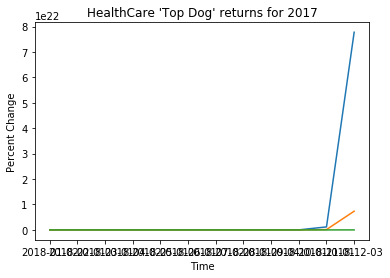

In [8]:
sectors = ['Technology','Financials','HealthCare']
start = '2015-01-01'
end   = '2017-12-31'
year_end,month,day = end.split('-')

top_start = '2018-01-01'
top_end   = '2018-12-31'

# Loop through sectors, to find top dogs by sector
for sector in sectors:
    print(f"Calculating Top Portfolio for {sector} for year end {year_end}")
    tickers = get_tickers_for_years(['2015','2016','2017'], sector)
    results_df = combined_df_for_timeframe(all_prices_df,tickers,start,end,sector)
    top10 = top_10_df(results_df)
    top_tickers = []
    top_tickers = top10['index'].tolist()
    top_dog_portfolio = combined_df_for_timeframe(all_prices_df,top_tickers,top_start,top_end,sector)
    #print(top_dog_portfolio)
    #print(top_dog_portfolio.plot( title=f"{sector} Portfolio Performance for {year_end}" )   )
    top_10_returns(top_dog_portfolio,sector,year_end)